# Tarea 2. Grupo 10. Task 1 y 2

## Task 1: Static Maps — Hospital Count by District

Load the district shapefile of Peru (link above).
With GeoPandas, create static maps showing the number of operational public hospitals per district:
- Map 1: Total public hospitals per district.
- Map 2: Highlight districts with zero hospitals.
- Map 3: Top 10 districts with the highest number of hospitals (distinct color scale).

### 1. Read libraries

In [1]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [2]:

import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet


In [3]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

### 2. Database joined

In [8]:
base = open(r'../_data/Datos_panel_distritos.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']
charenc

'utf-8'

### 2.1. Hospitals (MINSA – IPRESS)

In [9]:
cv_data = pd.read_csv(r'../_data/IPRESS.csv', encoding="latin1")
cv_data.head( 5 )

,Institución,Código Único,Nombre del establecimiento,Clasificación,Tipo,Departamento,Provincia,Distrito,UBIGEO,Dirección,...,Inicio de Actividad,Director Médico y/o Responsable de la Atención de Salud,Estado,Situación,Condición,Inspección,NORTE,ESTE,COTA,CAMAS
0,PRIVADO,16618,SONRIE MAS,CONSULTORIOS MEDICOS Y DE OTROS PROFESIONALES ...,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,LIMA,SANTIAGO DE SURCO,150140,"AV. CAMINOS DEL INCA 2028 OF.201, URBANIZACION...",...,11/03/2013,GILBERTO MARTIN AQUIJE GAVILAN,ACTIVADO,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,NaN
1,GOBIERNO REGIONAL,7050,AMBATO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,CAJAMARCA,CUTERVO,SANTA CRUZ,60611,COMUNIDAD DE AMBATO,...,29/06/2006,IDELSO MENOR CHAVEZ,ACTIVADO,,EN FUNCIONAMIENTO,,-78.858380,-6.133523,1724.0,NaN
2,GOBIERNO REGIONAL,99,SANTA ISABEL DE YUMBATURO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LORETO,LORETO,PARINARI,160302,ACTUALIZAR,...,01/01/1900,JULIO TONY CAITIMARI MACHOA,ACTIVADO,,EN FUNCIONAMIENTO,,-74.258139,-4.581509,124.0,NaN
3,PRIVADO,19555,DENTOCAPLINA,CONSULTORIOS MEDICOS Y DE OTROS PROFESIONALES ...,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,TACNA,TACNA,TACNA,230101,AV.LEGUIA 1892,...,30/12/2014,BYANCA LISSETTE ARANDA LANCHIPA,ACTIVADO,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,NaN
4,OTRO,18792,MEDICO DE FAMILIA MANTARA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,JUNIN,TARMA,TARMA,120701,JR. ROSA ZAPATEL S/N - BARRIO MANTARA - TARMA,...,06/07/2014,LILIAN DENISE ADAUTO DE LA CRUZ,ACTIVADO,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,NaN


In [10]:
#data filtrada

cv_data_filtrado = cv_data[cv_data["Condición"] == "EN FUNCIONAMIENTO"]
cv_data_filtrado.head()

,Institución,Código Único,Nombre del establecimiento,Clasificación,Tipo,Departamento,Provincia,Distrito,UBIGEO,Dirección,...,Inicio de Actividad,Director Médico y/o Responsable de la Atención de Salud,Estado,Situación,Condición,Inspección,NORTE,ESTE,COTA,CAMAS
0,PRIVADO,16618,SONRIE MAS,CONSULTORIOS MEDICOS Y DE OTROS PROFESIONALES ...,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,LIMA,SANTIAGO DE SURCO,150140,"AV. CAMINOS DEL INCA 2028 OF.201, URBANIZACION...",...,11/03/2013,GILBERTO MARTIN AQUIJE GAVILAN,ACTIVADO,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,NaN
1,GOBIERNO REGIONAL,7050,AMBATO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,CAJAMARCA,CUTERVO,SANTA CRUZ,60611,COMUNIDAD DE AMBATO,...,29/06/2006,IDELSO MENOR CHAVEZ,ACTIVADO,,EN FUNCIONAMIENTO,,-78.858380,-6.133523,1724.0,NaN
2,GOBIERNO REGIONAL,99,SANTA ISABEL DE YUMBATURO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LORETO,LORETO,PARINARI,160302,ACTUALIZAR,...,01/01/1900,JULIO TONY CAITIMARI MACHOA,ACTIVADO,,EN FUNCIONAMIENTO,,-74.258139,-4.581509,124.0,NaN
3,PRIVADO,19555,DENTOCAPLINA,CONSULTORIOS MEDICOS Y DE OTROS PROFESIONALES ...,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,TACNA,TACNA,TACNA,230101,AV.LEGUIA 1892,...,30/12/2014,BYANCA LISSETTE ARANDA LANCHIPA,ACTIVADO,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,NaN
4,OTRO,18792,MEDICO DE FAMILIA MANTARA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,JUNIN,TARMA,TARMA,120701,JR. ROSA ZAPATEL S/N - BARRIO MANTARA - TARMA,...,06/07/2014,LILIAN DENISE ADAUTO DE LA CRUZ,ACTIVADO,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,NaN


In [11]:
cv_data_filtrado = cv_data_filtrado.dropna(subset=["NORTE", "ESTE"])

### 2.2. Population Centers (INEI)

### 2.3. Administrative Boundaries (Districts of Peru)

In [12]:
# Upload shape file at district level

maps = gpd.read_file(r'../_data/shape_file/DISTRITOS.shp')

In [13]:
maps = maps[['IDDIST', 'geometry']]
maps = maps.rename({'IDDIST':'UBIGEO'}, axis =1 )
maps

,UBIGEO,geometry
0,100902,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975..."
1,100904,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,250305,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,250302,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,250304,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...
1868,100608,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,100609,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,100610,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,211105,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


In [14]:
# Object or srting to int

maps['UBIGEO'] = maps['UBIGEO'].astype(str).astype(int)
maps

,UBIGEO,geometry
0,100902,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975..."
1,100904,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,250305,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,250302,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,250304,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...
1868,100608,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,100609,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,100610,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,211105,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


In [15]:
# Ensure the dataset is in WGS-84 (EPSG:4326)
maps = maps.to_crs(epsg=4326)
maps.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### 3. Mergear las bases de datos y filtrar

In [60]:
# Merge using inner way to drop missing values 

dataset_cv = pd.merge(maps, cv_data_filtrado, how="inner", on="UBIGEO")
dataset_cv["Clasificación"].value_counts() #para ver cuantos hospitales hay

Clasificación
PUESTOS DE SALUD O POSTAS DE SALUD                                                         5869
CENTROS DE SALUD O CENTROS MEDICOS                                                         1190
CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO                                                 330
HOSPITALES O CLINICAS DE ATENCION GENERAL                                                   211
HOSPITALES O CLINICAS DE ATENCION ESPECIALIZADA                                              63
POLICLINICOS                                                                                 62
CONSULTORIOS MEDICOS Y DE OTROS PROFESIONALES DE LA SALUD                                    59
PATOLOGIA CLINICA                                                                            26
CENTROS MEDICOS ESPECIALIZADOS                                                               16
INSTITUTOS DE SALUD ESPECIALIZADOS                                                           16
PUESTOS DE SALUD O POSTAS 

## Mapas

### Map 1: Total public hospitals per district.

In [90]:
dataset_cv_final = dataset_cv

In [91]:
# Asegúrate de no perder la geometría de los distritos
dataset_cv_final = dataset_cv.copy()  # Mantener el DataFrame original intacto con geometría

# Filtrar solo hospitales públicos y operativos, pero no eliminar distritos sin hospitales
dataset_cv_filtered = dataset_cv_final[
    dataset_cv_final["Clasificación"].isin([
        "HOSPITALES O CLINICAS DE ATENCION GENERAL",
        "HOSPITALES O CLINICAS DE ATENCION ESPECIALIZADA"
    ])  # Filtramos solo hospitales o clínicas
]

# Filtrar hospitales públicos, omitiendo privados
dataset_cv_filtered = dataset_cv_filtered[~dataset_cv_filtered["Institución"].str.contains("PRIVADO", na=False)]

# Contar hospitales por UBIGEO solo para los hospitales públicos
dataset_cv_final["Hosp_Totales"] = dataset_cv_filtered.groupby("UBIGEO")["Institución"].transform("size").fillna(0).astype(int)

# Ahora dataset_cv_final tiene todos los distritos, y 'Hosp_Totales' se ha agregado correctamente


In [109]:
dataset_cv_final

,UBIGEO,geometry,Institución,Código Único,Nombre del establecimiento,Clasificación,Tipo,Departamento,Provincia,Distrito,...,Director Médico y/o Responsable de la Atención de Salud,Estado,Situación,Condición,Inspección,NORTE,ESTE,COTA,CAMAS,Hosp_Totales
0,100902,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975...",GOBIERNO REGIONAL,927,CODO DEL POZUZO,CENTROS DE SALUD O CENTROS MEDICOS,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,HUANUCO,PUERTO INCA,CODO DEL POZUZO,...,HENRY ROJAS CASTAÑEDA,ACTIVADO,,EN FUNCIONAMIENTO,,-75.463665,-9.669402,NaN,NaN,0.0
1,100902,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975...",GOBIERNO REGIONAL,1106,HUAMPOMAYO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,HUANUCO,PUERTO INCA,CODO DEL POZUZO,...,JESSICA MABEL PIÑAN PAREDES,ACTIVADO,,EN FUNCIONAMIENTO,,-75.591200,-9.969250,1600.0,NaN,0.0
2,100902,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975...",GOBIERNO REGIONAL,930,CHORROPAMPA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,HUANUCO,PUERTO INCA,CODO DEL POZUZO,...,VICTOR RAUL PONCIANO ESTELA,ACTIVADO,,EN FUNCIONAMIENTO,,-75.394620,-9.850610,320.0,NaN,0.0
3,100904,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...",GOBIERNO REGIONAL,916,PRINCIPE DE PAZ,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,HUANUCO,PUERTO INCA,TOURNAVISTA,...,JESUS MANUEL RAFAEL ESPINOZA,ACTIVADO,,EN FUNCIONAMIENTO,,-74.683542,-8.995790,273.7,NaN,0.0
4,100904,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...",GOBIERNO REGIONAL,912,TOURNAVISTA,CENTROS DE SALUD O CENTROS MEDICOS,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,HUANUCO,PUERTO INCA,TOURNAVISTA,...,ROCIO CAMPOS CERRON,ACTIVADO,,EN FUNCIONAMIENTO,,-74.702805,-8.934338,206.3,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889,150806,"POLYGON ((-77.3763 -10.89734, -77.37604 -10.89...",GOBIERNO REGIONAL,5685,PEÑICO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,HUAURA,HUAURA,...,EDY ELODIA MARIN GARCIA,ACTIVADO,,EN FUNCIONAMIENTO,,-77.437500,-10.931177,594.0,NaN,0.0
7890,150806,"POLYGON ((-77.3763 -10.89734, -77.37604 -10.89...",ESSALUD,10392,CENTRO DE ATENCION PRIMARIA I HUMAYA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,HUAURA,HUAURA,...,JAVIER IVAN HENOSTROZA CACERES,ACTIVADO,,EN FUNCIONAMIENTO,,-77.409616,-11.098534,NaN,NaN,0.0
7891,150806,"POLYGON ((-77.3763 -10.89734, -77.37604 -10.89...",GOBIERNO REGIONAL,5684,VILCAHUAURA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,HUAURA,HUAURA,...,MARIA VICTORIA ECHENIQUE GARCIA,ACTIVADO,,EN FUNCIONAMIENTO,,-77.474190,-11.072751,264.0,NaN,0.0
7892,150806,"POLYGON ((-77.3763 -10.89734, -77.37604 -10.89...",GOBIERNO REGIONAL,5683,HUMAYA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,HUAURA,HUAURA,...,MIRTHA MARY CALDERON BARRETO,ACTIVADO,,EN FUNCIONAMIENTO,,-77.409943,-11.099675,NaN,NaN,0.0


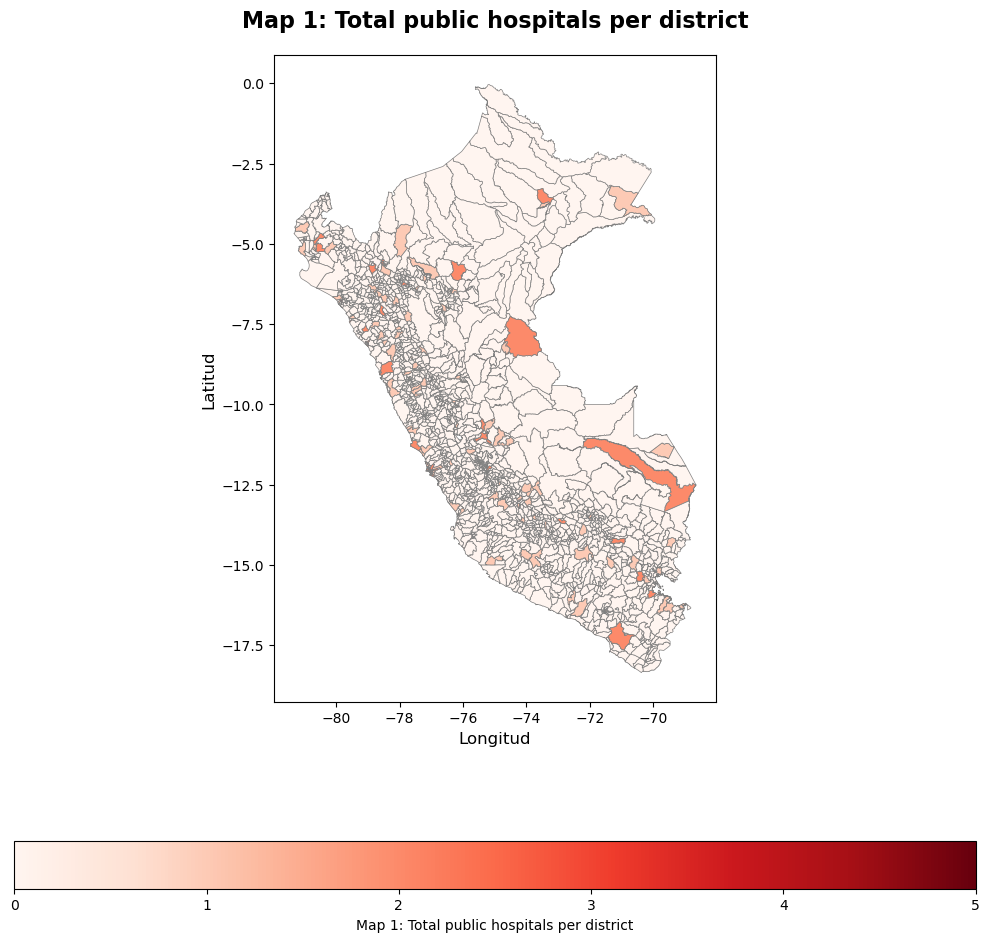

In [104]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Asegúrate de que `maps` tiene todos los distritos, incluso los que no tienen hospitales
# Usamos el shapefile `maps` que tiene todas las geometrías

# Realizar un merge con los datos de hospitales públicos para obtener la columna 'Hosp_Totales'
# Esto garantiza que incluso los distritos sin hospitales se mantendrán en el mapa
base = maps.merge(
    dataset_cv_final[["UBIGEO", "Hosp_Totales"]].drop_duplicates(),
    how="left",  # 'left' para asegurarnos de que todos los distritos estén en el mapa
    on="UBIGEO"
)

# Rellenar los NaN (distritos sin hospitales) con 0
base["Hosp_Totales"] = base["Hosp_Totales"].fillna(0).astype(int)

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar el mapa, con todos los distritos (incluso los que no tienen hospitales)
base.plot(
    column="Hosp_Totales",  # Columna a visualizar
    cmap="Reds",            # Paleta de colores
    edgecolor="gray",       # Bordes grises para que las líneas de los distritos se vean
    linewidth=0.5,          # Grosor del borde
    ax=ax,                  # Ejes del gráfico
    legend=True,            # Incluir la leyenda
    legend_kwds={'label': "Map 1: Total public hospitals per district", 'orientation': "horizontal"},
    vmin=0,                 # Asegurar que el valor mínimo sea 0 (distritos sin hospitales)
    vmax=base["Hosp_Totales"].max()  # El máximo es el valor más alto de hospitales
)

# Añadir título y etiquetas
ax.set_title("Map 1: Total public hospitals per district", fontsize=16, fontweight="bold", pad=20)
ax.set_xlabel("Longitud", fontsize=12)
ax.set_ylabel("Latitud", fontsize=12)

# Mostrar el gráfico
plt.tight_layout()  # Ajusta el layout para evitar solapamientos
plt.show()


### Map 2: Highlight districts with zero hospitals.

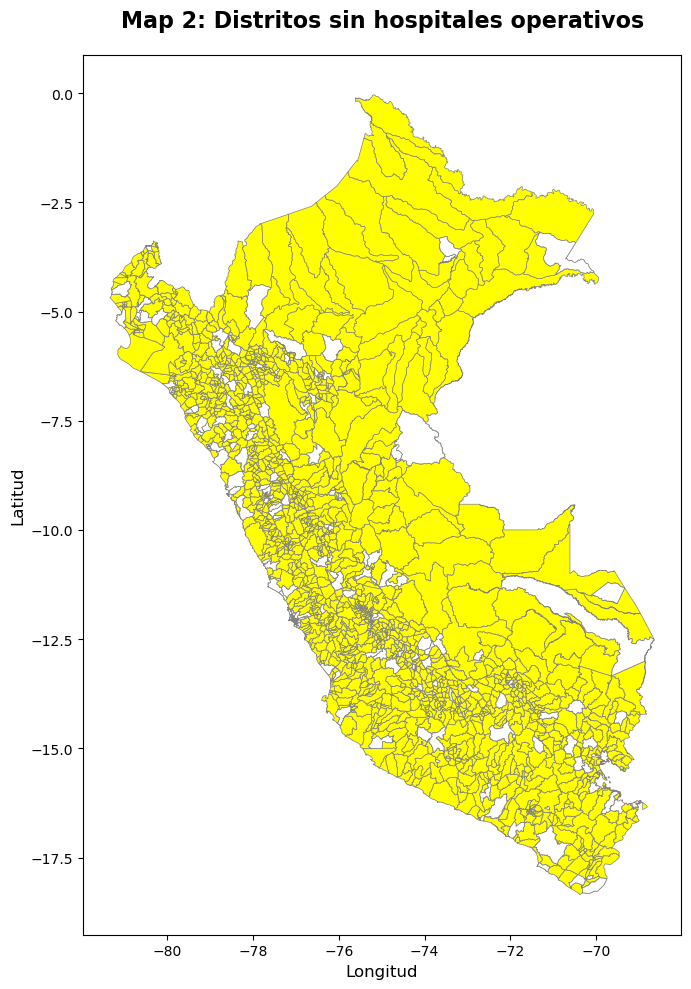

In [93]:
# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 10))

# Primero graficamos los distritos sin hospitales con color amarillo
base[base["Hosp_Totales"] == 0].plot(
    color="yellow",  # Resaltar en amarillo los distritos sin hospitales
    edgecolor="gray", # Bordes grises
    linewidth=0.5,    # Grosor del borde
    ax=ax             # Ejes del gráfico
)

# Luego graficamos los distritos con hospitales, pero sin color (es decir, los dejamos transparentes)
base[base["Hosp_Totales"] > 0].plot(
    color="white",    # Dejar los distritos con hospitales sin color (blanco o transparente)
    edgecolor="gray", # Bordes grises
    linewidth=0.5,    # Grosor del borde
    ax=ax             # Ejes del gráfico
)

# Añadir título y etiquetas
ax.set_title("Map 2: Distritos sin hospitales operativos", fontsize=16, fontweight="bold", pad=20)
ax.set_xlabel("Longitud", fontsize=12)
ax.set_ylabel("Latitud", fontsize=12)

# Mostrar el gráfico
plt.tight_layout()  # Ajusta el layout para evitar solapamientos
plt.show()

### Map 3: Top 10 districts with the highest number of hospitals (distinct color scale).

In [181]:
# Agrupar por UBIGEO y sumar los hospitales
data_agg = dataset_cv_final.groupby('UBIGEO').agg({'Hosp_Totales': 'sum'}).reset_index()

# Asegurarnos de que 'geometry' también esté presente (y la columna 'UBIGEO' esté alineada)
# Si la columna de geometría está en un nombre diferente, asegúrate de renombrarla si es necesario
data_agg['geometry'] = dataset_cv_final.groupby('UBIGEO').agg({'geometry': 'first'}).reset_index()['geometry']

# Rellenar los NaN en 'Hosp_Totales' con 0 para los distritos sin hospitales
data_agg['Hosp_Totales'] = data_agg['Hosp_Totales'].fillna(0)



In [183]:
data_agg

,UBIGEO,Hosp_Totales,geometry
0,10101,4.0,"POLYGON ((-77.88323 -6.17846, -77.88071 -6.179..."
1,10102,0.0,"POLYGON ((-77.72929 -5.9886, -77.72923 -5.9887..."
2,10103,0.0,"POLYGON ((-77.93289 -6.6921, -77.92945 -6.6921..."
3,10104,0.0,"POLYGON ((-77.7119 -6.25207, -77.71114 -6.2521..."
4,10105,0.0,"POLYGON ((-77.7387 -6.02799, -77.73739 -6.0287..."
...,...,...,...
1807,250302,0.0,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
1808,250303,0.0,"POLYGON ((-75.43663 -8.22999, -75.43651 -8.230..."
1809,250304,0.0,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
1810,250305,0.0,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."


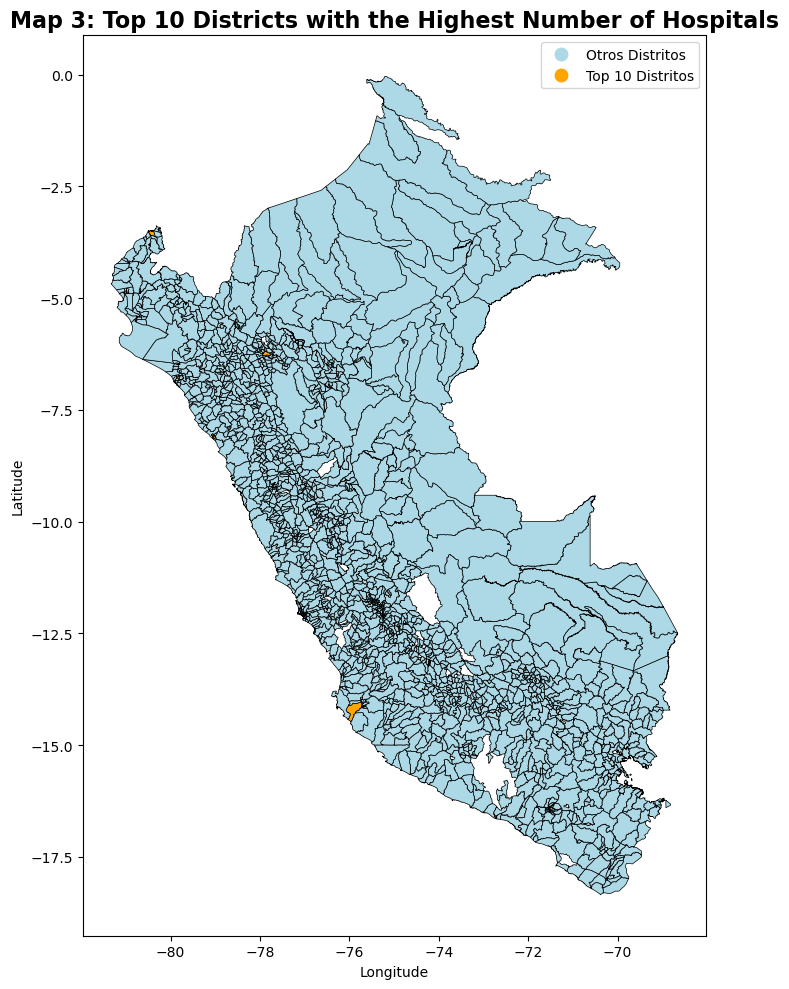

In [190]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Ordenar 'data_agg' para encontrar los 10 distritos con el mayor número de hospitales
top_10_districts = data_agg.sort_values(by='Hosp_Totales', ascending=False).head(10)

# Crear una nueva columna en data_agg para diferenciar los top 10 distritos
data_agg['Top_10'] = data_agg['UBIGEO'].isin(top_10_districts['UBIGEO'])

# Crear la figura
fig, ax = plt.subplots(figsize=(12, 10))

# Definir la paleta de colores personalizada
cmap = ListedColormap(['lightblue', 'orange'])  # lightblue para los no top, orange para los top 10

# Graficar todos los distritos, resaltar solo los top 10
data_agg.plot(
    column='Top_10',  # Columna que indica si es top 10
    cmap=cmap,  # Escala de colores personalizada
    legend=True,  # Mostrar la leyenda
    ax=ax,  # Pasar el eje al gráfico
    linewidth=0.5,  # Grosor del borde
    edgecolor='black',  # Bordes de los distritos
    legend_kwds={'labels': ['Otros Distritos', 'Top 10 Distritos']}  # Modificar etiquetas de la leyenda
)

# Título y etiquetas
ax.set_title('Map 3: Top 10 Districts with the Highest Number of Hospitals', fontsize=16, fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Task 2: Department-level Analysis

In [152]:
from shapely.ops import unary_union

# Agrupar por 'Departamento' y sumar los hospitales, combinar las geometrías
data2 = dataset_cv_final.groupby('Departamento').agg(
    {'Hosp_Totales': 'sum'}  # Combina las geometrías
).reset_index()

In [153]:
# Mostrar el total de hospitales x departamento

data2

,Departamento,Hosp_Totales
0,AMAZONAS,11.0
1,ANCASH,18.0
2,APURIMAC,7.0
3,AREQUIPA,17.0
4,AYACUCHO,10.0
5,CAJAMARCA,14.0
6,CALLAO,15.0
7,CUSCO,11.0
8,HUANCAVELICA,5.0
9,HUANUCO,7.0


In [154]:
# Identificar el departamento con el mayor número de hospitales
max_hospitals = data2.loc[data2['Hosp_Totales'].idxmax()]

# Identificar el departamento con el menor número de hospitales
min_hospitals = data2.loc[data2['Hosp_Totales'].idxmin()]

# Mostrar los resultados
print(f"Departamento con el mayor número de hospitales: {max_hospitals['Departamento']} - {max_hospitals['Hosp_Totales']} hospitales")
print(f"Departamento con el menor número de hospitales: {min_hospitals['Departamento']} - {min_hospitals['Hosp_Totales']} hospitales")

Departamento con el mayor número de hospitales: LIMA - 84.0 hospitales
Departamento con el menor número de hospitales: TACNA - 2.0 hospitales


### Task 2

#### Output 1: A summary table (sorted from highest to lowest).


In [155]:
# Ordenar de mayor a menor
data2_sorted = data2.sort_values(by="Hosp_Totales", ascending=False)

# Mostrar la tabla resumen
import pandas as pd

# Seleccionar todas las columnas excepto 'geometry'
columns_to_show = [col for col in data2_sorted.columns if col != 'geometry']

# Mostrar solo las columnas seleccionadas (sin 'geometry')
data2_sorted[columns_to_show]


,Departamento,Hosp_Totales
14,LIMA,84.0
12,LA LIBERTAD,65.0
13,LAMBAYEQUE,28.0
1,ANCASH,18.0
3,AREQUIPA,17.0
20,PUNO,17.0
11,JUNIN,17.0
6,CALLAO,15.0
10,ICA,15.0
21,SAN MARTIN,14.0


#### Output 2: A bar chart (matplotlib or seaborn).

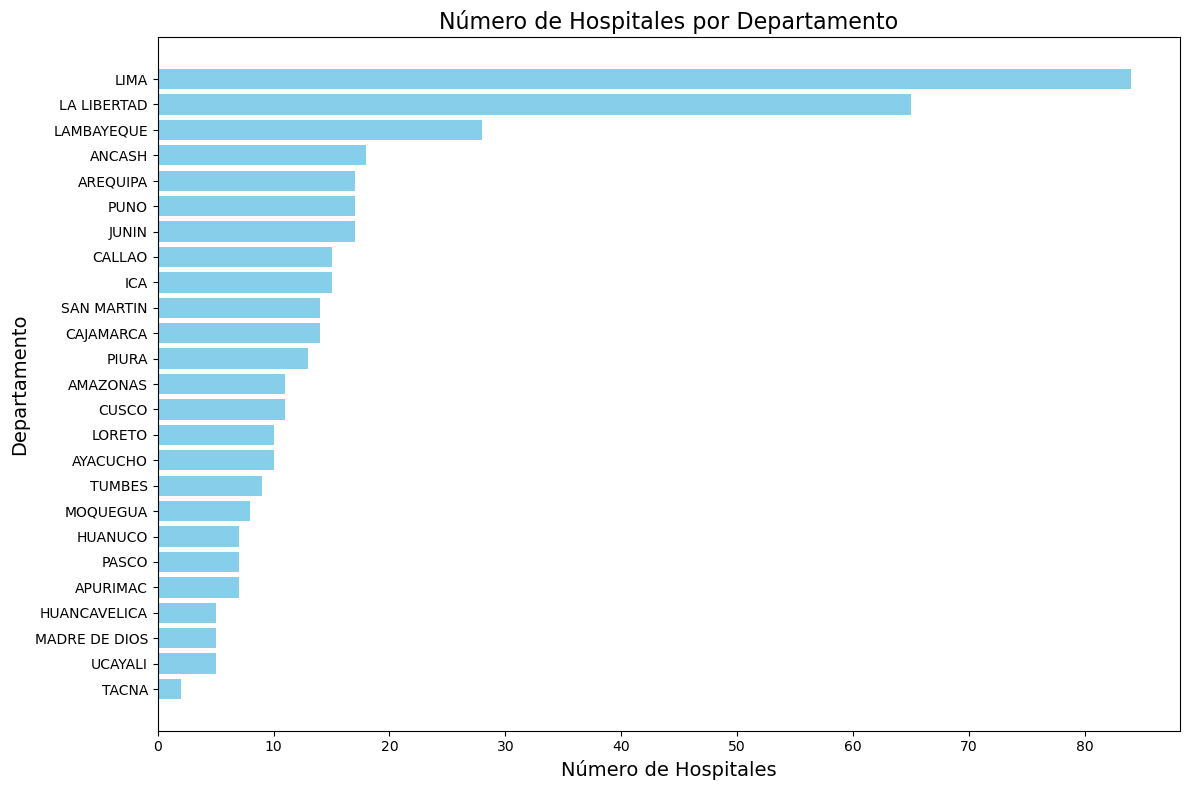

In [156]:
import matplotlib.pyplot as plt

# Crear gráfico de barras
plt.figure(figsize=(12, 8))
plt.barh(data2_sorted['Departamento'], data2_sorted['Hosp_Totales'], color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Número de Hospitales', fontsize=14)
plt.ylabel('Departamento', fontsize=14)
plt.title('Número de Hospitales por Departamento', fontsize=16)
plt.gca().invert_yaxis()  # Para mostrar el departamento con más hospitales arriba

# Mostrar gráfico
plt.tight_layout()
plt.show()


#### Output 3: A department-level choropleth map (GeoPandas).

In [157]:
data2_sorted

,Departamento,Hosp_Totales
14,LIMA,84.0
12,LA LIBERTAD,65.0
13,LAMBAYEQUE,28.0
1,ANCASH,18.0
3,AREQUIPA,17.0
20,PUNO,17.0
11,JUNIN,17.0
6,CALLAO,15.0
10,ICA,15.0
21,SAN MARTIN,14.0


#### Preparación para el mapa: Acomodar la base de datos con geometry

In [134]:
dist_shp = gpd.read_file(r'../_data/shape_file/DISTRITOS.shp')

In [135]:
dist_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [136]:
dist_shp.to_crs(24891).centroid.to_crs( 4326 )

0        POINT (-75.46643 -9.63426)
1         POINT (-74.8663 -9.00133)
2        POINT (-75.04801 -8.82493)
3        POINT (-75.27987 -8.95039)
4        POINT (-75.04902 -8.64129)
                   ...             
1868     POINT (-76.03798 -9.20808)
1869     POINT (-76.00134 -9.08221)
1870     POINT (-75.98295 -8.98489)
1871    POINT (-70.12642 -15.40623)
1872    POINT (-77.44521 -11.00357)
Length: 1873, dtype: geometry

In [137]:
dist_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [138]:
projected_dist_shp = dist_shp.to_crs( epsg = 24891 )

projected_dist_shp[ 'centroids'] = projected_dist_shp.centroid

In [139]:
dist_shp[ 'Centroid_Latitude' ] = projected_dist_shp[ 'centroids' ].to_crs( epsg = 4326 ).y
dist_shp[ 'Centroid_Longitude' ] = projected_dist_shp[ 'centroids' ].to_crs( epsg = 4326 ).x

<AxesSubplot:>

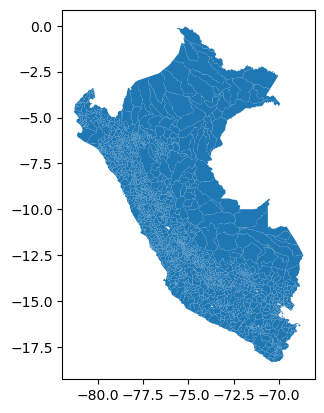

In [140]:
dist_shp.plot()

In [141]:
prov_shp = dist_shp.dissolve( by = 'IDPROV' )

<AxesSubplot:>

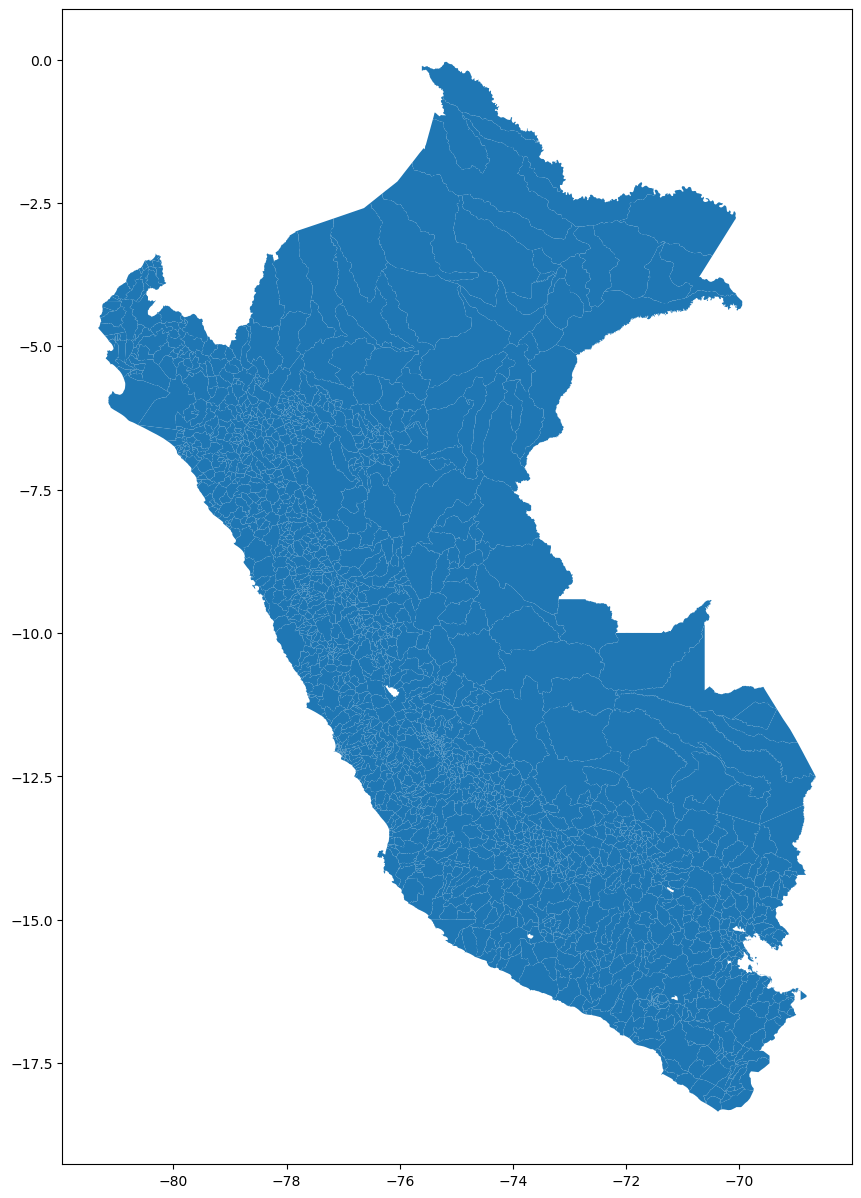

In [142]:
fig, ax = plt.subplots( figsize = ( 12, 15 ) )
dist_shp.plot( ax = ax )

<AxesSubplot:>

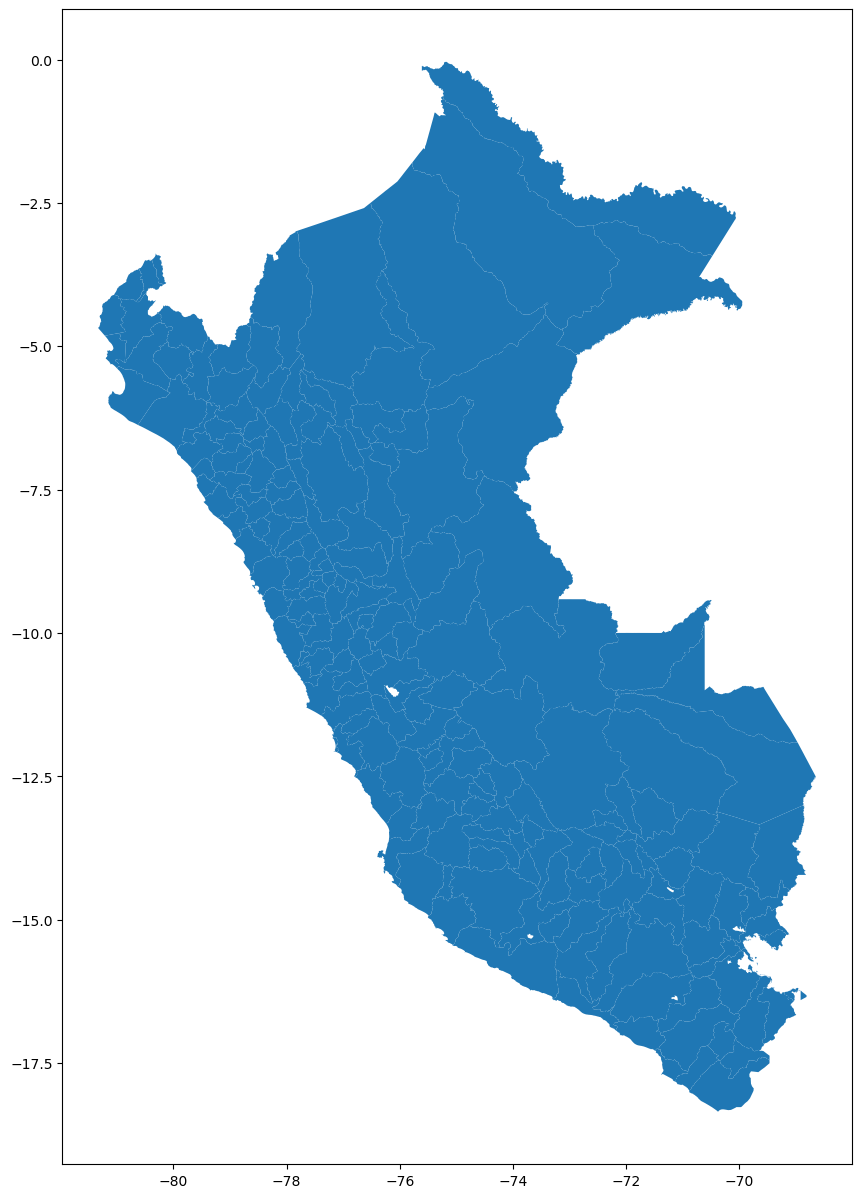

In [143]:
fig, ax = plt.subplots( figsize = ( 12, 15 ) )
prov_shp.plot( ax = ax )

In [144]:
dpt_shp = dist_shp.dissolve( by = 'IDDPTO' )

<AxesSubplot:>

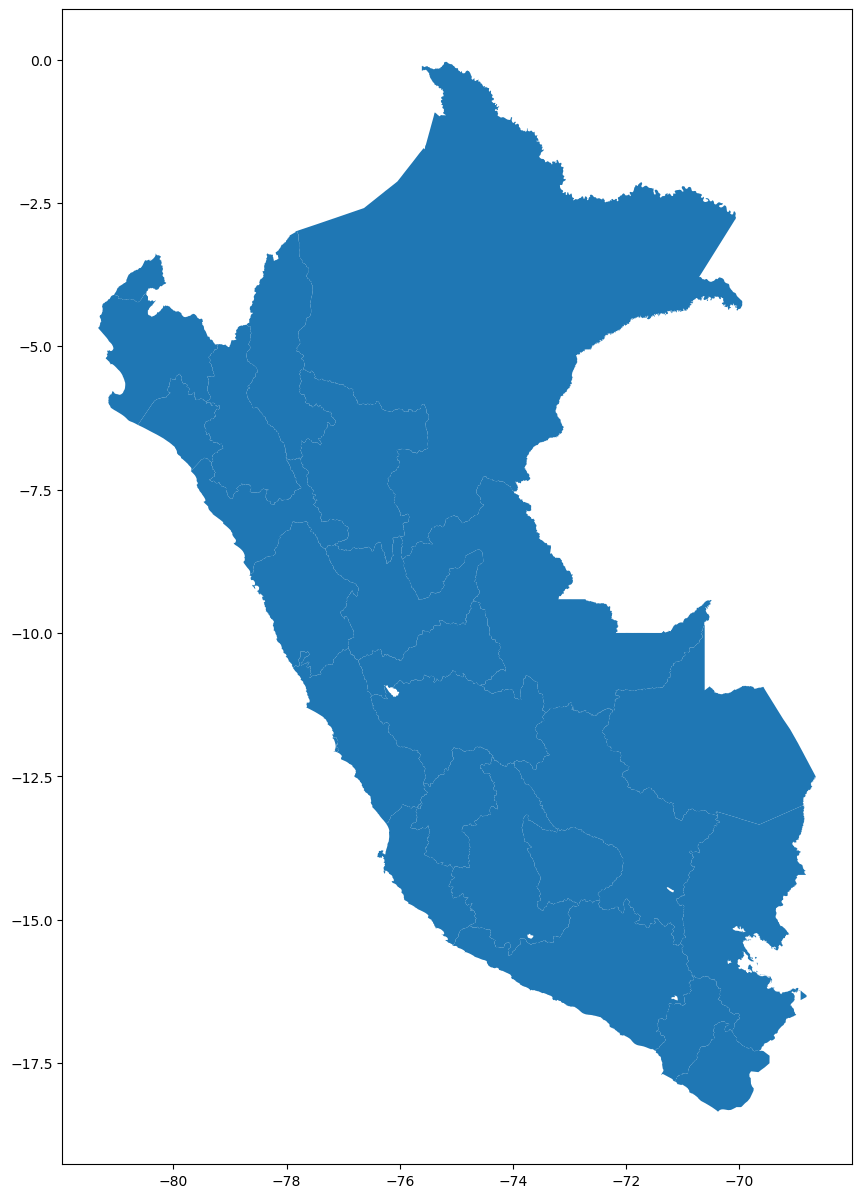

In [145]:
fig, ax = plt.subplots( figsize = ( 12, 15 ) )
dpt_shp.plot( ax = ax )

In [149]:
dpt_shp.()

,geometry,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,Centroid_Latitude,Centroid_Longitude
IDDPTO,,,,,,,,,,,,
01,"POLYGON ((-78.0348 -6.74216, -78.03437 -6.7417...",AMAZONAS,0101,CHACHAPOYAS,010103,BALSAS,BALSAS,0001,1,INEI,-6.807835,-77.949420
02,"POLYGON ((-77.70189 -10.32392, -77.70434 -10.3...",ANCASH,0218,SANTA,021805,MORO,MORO,0001,1,INEI,-9.163285,-78.123967
03,"POLYGON ((-73.51174 -14.53852, -73.51368 -14.5...",APURIMAC,0306,CHINCHEROS,030607,URANMARCA,URANMARCA,0001,1,INEI,-13.668455,-73.652497
04,"POLYGON ((-72.72968 -16.64631, -72.73106 -16.6...",AREQUIPA,0407,ISLAY,040706,PUNTA DE BOMBON,PUNTA DE BOMBON,0001,1,INEI,-17.160055,-71.550624
05,"POLYGON ((-74.50284 -15.16064, -74.5036 -15.16...",AYACUCHO,0504,HUANTA,050404,IGUAIN,MACACHACRA,0001,1,INEI,-12.983084,-74.218243


In [158]:
# Renombrar la columna 'Departamento' en data2 a 'DEPARTAMEN' para que coincida con dpt_shp
data2.rename(columns={'Departamento': 'DEPARTAMEN'}, inplace=True)

# Ahora, puedes hacer el merge entre dpt_shp y data2 usando la columna 'DEPARTAMEN'
merged_data = dpt_shp.merge(data2, on='DEPARTAMEN', how='left')

merged_data


,geometry,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,Centroid_Latitude,Centroid_Longitude,Hosp_Totales
0,"POLYGON ((-78.0348 -6.74216, -78.03437 -6.7417...",AMAZONAS,0101,CHACHAPOYAS,010103,BALSAS,BALSAS,0001,1,INEI,-6.807835,-77.949420,11.0
1,"POLYGON ((-77.70189 -10.32392, -77.70434 -10.3...",ANCASH,0218,SANTA,021805,MORO,MORO,0001,1,INEI,-9.163285,-78.123967,18.0
2,"POLYGON ((-73.51174 -14.53852, -73.51368 -14.5...",APURIMAC,0306,CHINCHEROS,030607,URANMARCA,URANMARCA,0001,1,INEI,-13.668455,-73.652497,7.0
3,"POLYGON ((-72.72968 -16.64631, -72.73106 -16.6...",AREQUIPA,0407,ISLAY,040706,PUNTA DE BOMBON,PUNTA DE BOMBON,0001,1,INEI,-17.160055,-71.550624,17.0
4,"POLYGON ((-74.50284 -15.16064, -74.5036 -15.16...",AYACUCHO,0504,HUANTA,050404,IGUAIN,MACACHACRA,0001,1,INEI,-12.983084,-74.218243,10.0
5,"POLYGON ((-79.07326 -7.46865, -79.08528 -7.462...",CAJAMARCA,0605,CONTUMAZA,060505,SAN BENITO,SAN BENITO,0001,1,INEI,-7.502797,-78.962319,14.0
6,"POLYGON ((-77.10504 -12.07191, -77.10599 -12.0...",CALLAO,0701,CALLAO,070105,LA PUNTA,LA PUNTA,0001,1,INEI,-12.071695,-77.162783,15.0
7,"POLYGON ((-71.89418 -14.78954, -71.89579 -14.7...",CUSCO,0808,ESPINAR,080805,PALLPATA,HECTOR TEJADA,0001,1,INEI,-14.907336,-71.091134,11.0
8,"POLYGON ((-75.26012 -14.04196, -75.26102 -14.0...",HUANCAVELICA,0906,HUAYTARA,090613,SANTIAGO DE CHOCORVOS,SANTIAGO DE CHOCORVOS,0001,1,INEI,-13.813373,-75.214760,5.0
9,"POLYGON ((-76.80833 -10.39296, -76.81024 -10.3...",HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,-9.634258,-75.466433,7.0


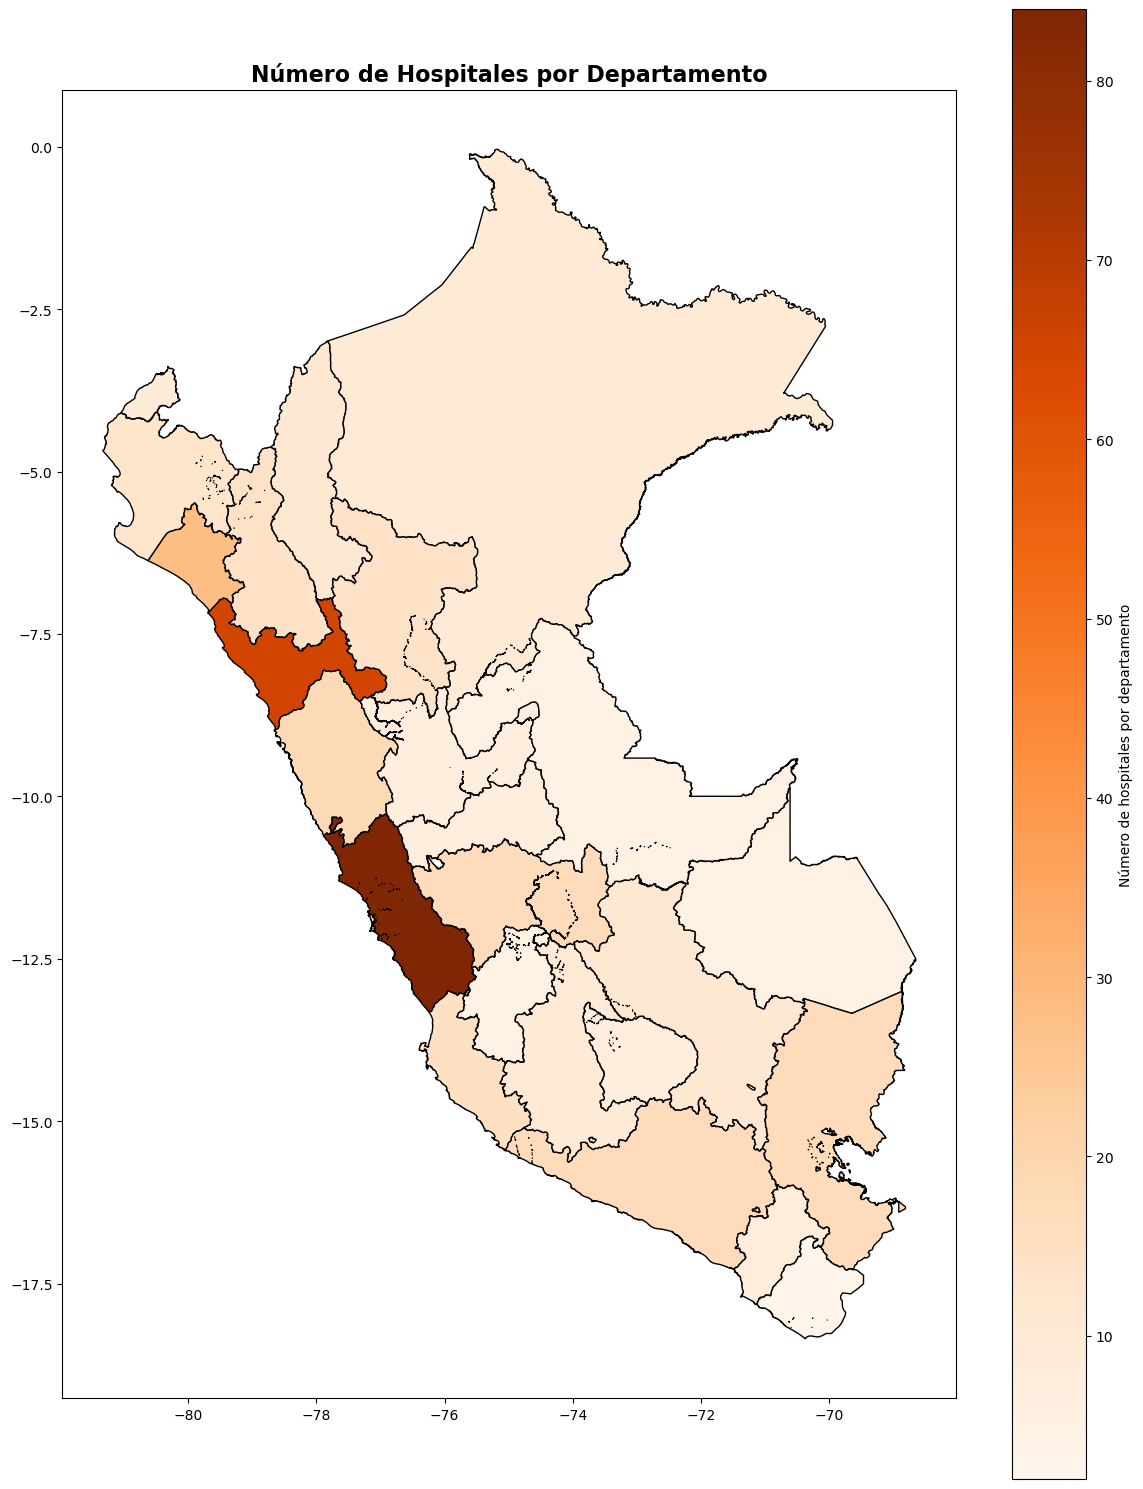

In [162]:

# Crear la figura
fig, ax = plt.subplots(figsize=(12, 15))

# Graficar solo los departamentos (sin los distritos)
merged_data.plot(column='Hosp_Totales', ax=ax, legend=True, cmap='Oranges', legend_kwds={'label': "Número de hospitales por departamento"}, edgecolor='black')

# Título y ajuste del gráfico
ax.set_title('Número de Hospitales por Departamento', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()
